In [5]:
import argparse
import glob
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
def get_section_results(file):
    """
        Extracts training steps and average returns from TensorBoard logs.
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
        if len(X) > 120:  # Limit the number of points to avoid very long plots
            break
    return X, Y

In [1]:
!ls ../

Images         __pycache__    critics        infrastructure scripts
__init__.py    agents         envs           policies


In [7]:
def plot_results(exp_name, label_name):
    logdir = os.path.join('../../data', f"{exp_name}*", "events*")
    eventfiles = glob.glob(logdir)
    
    result = []
    for eventfile in eventfiles:
        X, Y = get_section_results(eventfile)
        result.append(Y)
    
    X = X[1:]
    mean = np.mean(np.array(result), axis=0)
    std = np.std(np.array(result), axis=0)
    
    plt.errorbar(X, mean, yerr=std, label=label_name, capsize=5)
    plt.xlabel('Train Steps')
    plt.ylabel('Average Return')
    plt.grid(True)
    plt.title(f'DQN vs. Double DQN Average Return')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


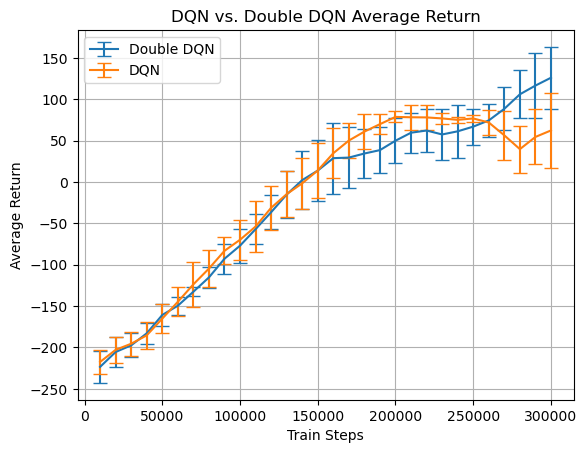

In [8]:
plot_results('q1_doubledqn', 'Double DQN')
plot_results('q1_dqn', 'DQN')
plt.legend()
plt.savefig("../Images/q1.png")